In [5]:
import pandas as pd

# File path to the train dataset
file_path = r"C:\Users\Sai\OneDrive\Data Engineering\smart inventory forecasting\data\demand-forecasting-kernels-only\train.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Inspect the first few rows
print(df.head())

# Display dataset info
print(df.info())

# Display summary statistics
print(df.describe())

# Check for missing values
print("\nMissing Values in Each Column:\n")
print(df.isnull().sum())

# Check for unique values in categorical columns (if any)
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nUnique values in '{col}':\n{df[col].unique()}")


         date  store  item  sales
0  2013-01-01      1     1     13
1  2013-01-02      1     1     11
2  2013-01-03      1     1     14
3  2013-01-04      1     1     13
4  2013-01-05      1     1     10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB
None
               store           item          sales
count  913000.000000  913000.000000  913000.000000
mean        5.500000      25.500000      52.250287
std         2.872283      14.430878      28.801144
min         1.000000       1.000000       0.000000
25%         3.000000      13.000000      30.000000
50%         5.500000      25.500000      47.000000
75%         8.000000      38.000000      70.000000


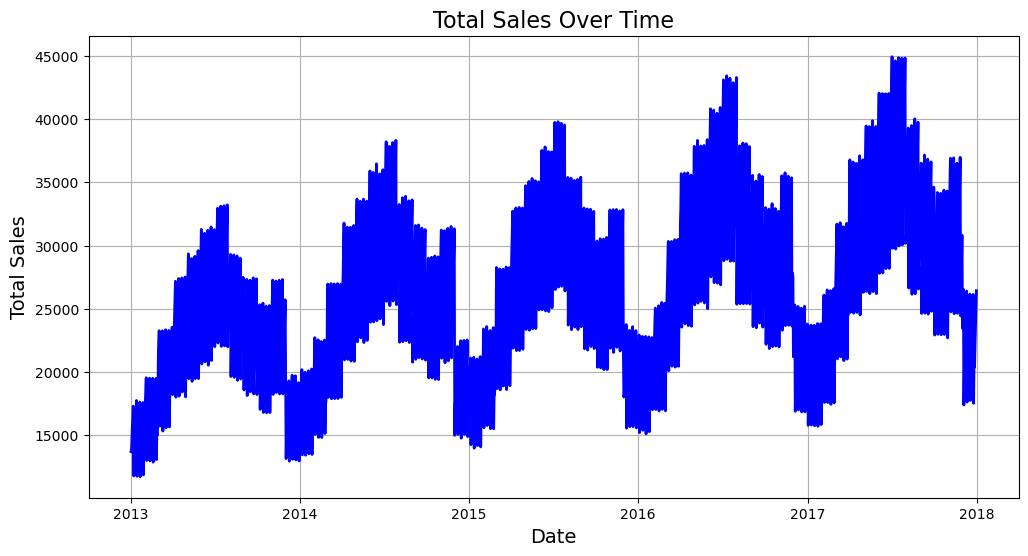

In [7]:
import matplotlib.pyplot as plt

# Convert 'date' column to datetime if not already done
df['date'] = pd.to_datetime(df['date'])

# Aggregate sales by date
sales_by_date = df.groupby('date')['sales'].sum()

# Plot sales over time
plt.figure(figsize=(12, 6))
plt.plot(sales_by_date.index, sales_by_date.values, color='blue', linewidth=2)
plt.title('Total Sales Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.grid()
plt.show()


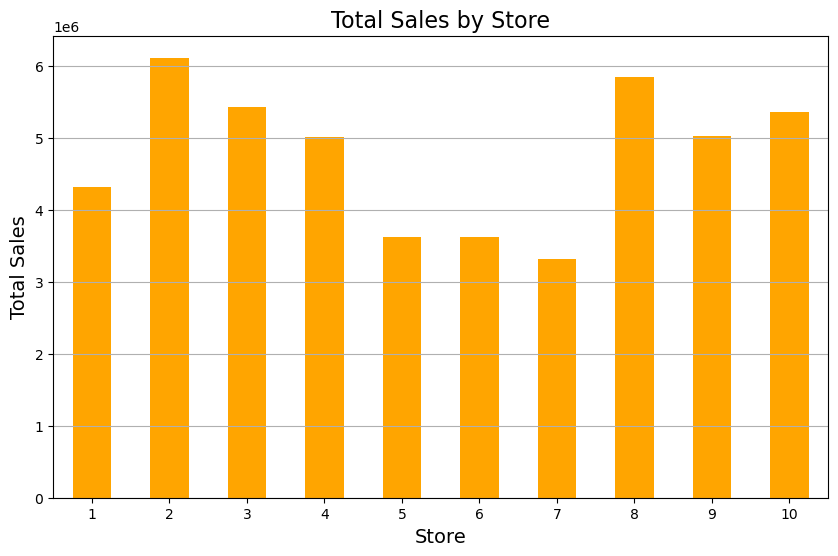

In [9]:
# Aggregate sales by store
sales_by_store = df.groupby('store')['sales'].sum()

# Plot sales by store
plt.figure(figsize=(10, 6))
sales_by_store.plot(kind='bar', color='orange')
plt.title('Total Sales by Store', fontsize=16)
plt.xlabel('Store', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


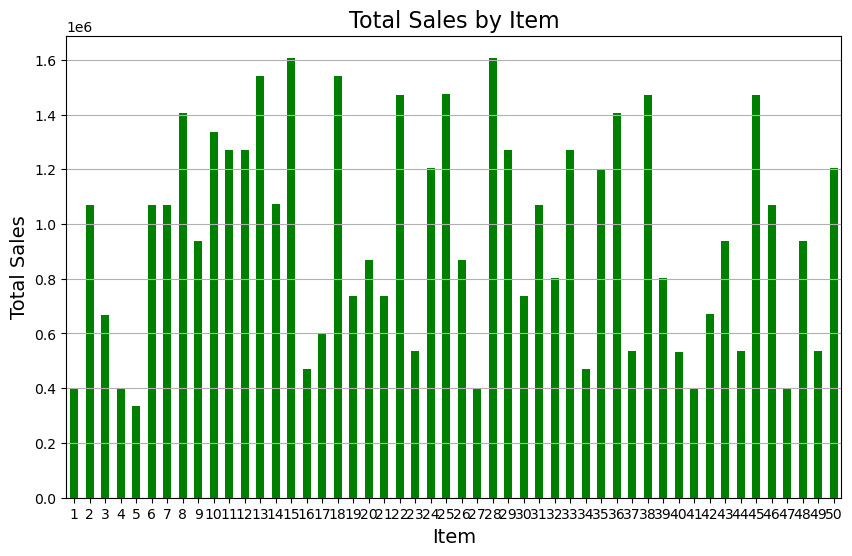

In [11]:
# Aggregate sales by item
sales_by_item = df.groupby('item')['sales'].sum()

# Plot sales by item
plt.figure(figsize=(10, 6))
sales_by_item.plot(kind='bar', color='green')
plt.title('Total Sales by Item', fontsize=16)
plt.xlabel('Item', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


In [13]:
# Check for missing values
print("\nMissing values in each column:\n")
print(df.isnull().sum())

# Fill missing values (if any)
# Example: Fill missing sales with 0 (or choose another strategy)
df['sales'] = df['sales'].fillna(0)

# Confirm missing values are handled
print("\nMissing values after cleaning:\n")
print(df.isnull().sum())




Missing values in each column:

date     0
store    0
item     0
sales    0
dtype: int64

Missing values after cleaning:

date     0
store    0
item     0
sales    0
dtype: int64


In [15]:
# Extract features from the date
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# Display the first few rows with new features
print(df.head())


        date  store  item  sales  year  month  day  day_of_week
0 2013-01-01      1     1     13  2013      1    1            1
1 2013-01-02      1     1     11  2013      1    2            2
2 2013-01-03      1     1     14  2013      1    3            3
3 2013-01-04      1     1     13  2013      1    4            4
4 2013-01-05      1     1     10  2013      1    5            5


In [17]:
# Create lag features (e.g., sales from the previous 1, 7, and 30 days)
df['lag_1'] = df['sales'].shift(1)  # Previous day's sales
df['lag_7'] = df['sales'].shift(7)  # Sales from 7 days ago
df['lag_30'] = df['sales'].shift(30)  # Sales from 30 days ago

# Display the first few rows
print(df[['date', 'sales', 'lag_1', 'lag_7', 'lag_30']].head(10))


        date  sales  lag_1  lag_7  lag_30
0 2013-01-01     13    NaN    NaN     NaN
1 2013-01-02     11   13.0    NaN     NaN
2 2013-01-03     14   11.0    NaN     NaN
3 2013-01-04     13   14.0    NaN     NaN
4 2013-01-05     10   13.0    NaN     NaN
5 2013-01-06     12   10.0    NaN     NaN
6 2013-01-07     10   12.0    NaN     NaN
7 2013-01-08      9   10.0   13.0     NaN
8 2013-01-09     12    9.0   11.0     NaN
9 2013-01-10      9   12.0   14.0     NaN


In [76]:
# Drop rows with NaN values (caused by lag features)
df = df.dropna()

# Define the features (X) and target variable (y)
X = df[['lag_1', 'lag_7', 'lag_30']]  # Add more features if needed
y = df['sales']


In [78]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)


In [85]:
from xgboost import XGBRegressor


MAE: 6.639334821475412
RMSE: 8.668355137672004
MAPE: 18.67%


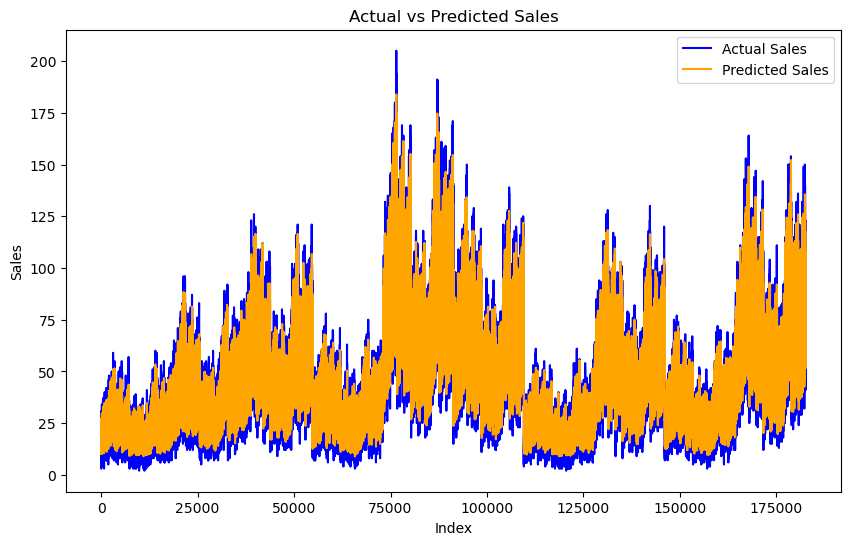

In [87]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Prepare and Clean Data
df['lag_1'] = df['sales'].shift(1)  # Previous day's sales
df['lag_7'] = df['sales'].shift(7)  # Sales from 7 days ago
df['lag_30'] = df['sales'].shift(30)  # Sales from 30 days ago
df = df.dropna()  # Drop rows with NaN caused by lag features

# Step 2: Define Features and Target
X = df[['lag_1', 'lag_7', 'lag_30']]  # Feature columns
y = df['sales']  # Target variable

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Step 4: Train the XGBoost Model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape:.2f}%")

# Step 7: Visualize Actual vs Predicted Sales
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Sales', color='blue')
plt.plot(y_pred, label='Predicted Sales', color='orange')
plt.legend()
plt.title('Actual vs Predicted Sales')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.show()


In [89]:
import joblib
joblib.dump(model, 'xgboost_inventory_forecasting.pkl')


['xgboost_inventory_forecasting.pkl']

In [91]:
results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
results.to_csv('forecast_results.csv', index=False)


In [93]:
# Add rolling averages
df['rolling_avg_7'] = df['sales'].rolling(window=7).mean().shift(1)
df['rolling_avg_14'] = df['sales'].rolling(window=14).mean().shift(1)
df['rolling_avg_30'] = df['sales'].rolling(window=30).mean().shift(1)

# Add day of the week
df['day_of_week'] = pd.to_datetime(df['date']).dt.dayofweek

# Add month of the year
df['month'] = pd.to_datetime(df['date']).dt.month

# Drop rows with NaN caused by rolling averages
df = df.dropna()

# Update features for training
X = df[['lag_1', 'lag_7', 'lag_30', 'rolling_avg_7', 'rolling_avg_14', 'rolling_avg_30', 'day_of_week', 'month']]
y = df['sales']


In [95]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Retrain the model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"MAE after feature engineering: {mae}")
print(f"RMSE after feature engineering: {rmse}")
print(f"MAPE after feature engineering: {mape:.2f}%")


MAE after feature engineering: 5.490621182340098
RMSE after feature engineering: 7.1437951772293475
MAPE after feature engineering: 15.23%


In [97]:
# Save the enhanced model
joblib.dump(model, 'xgboost_inventory_forecasting_enhanced.pkl')

# Save results to CSV
enhanced_results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
enhanced_results.to_csv('enhanced_forecast_results.csv', index=False)


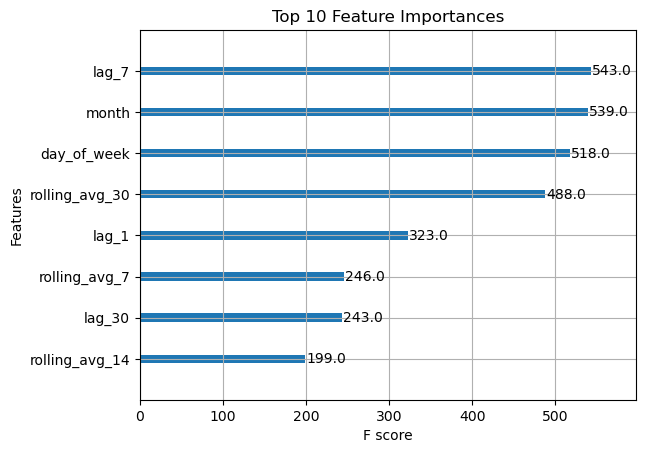

In [101]:
from xgboost import plot_importance

# Plot feature importance
plot_importance(model, importance_type='weight', max_num_features=10)
plt.title('Top 10 Feature Importances')
plt.show()


In [103]:
import joblib

# Save the enhanced model
joblib.dump(model, 'xgboost_inventory_forecasting_enhanced.pkl')

import pandas as pd

# Save results to a CSV file
enhanced_results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
enhanced_results.to_csv('enhanced_forecast_results.csv', index=False)

print("Results saved to 'enhanced_forecast_results.csv'")



Results saved to 'enhanced_forecast_results.csv'
